The Weight vector(Emrical Risk Minimization classifier) learnt is:
[[-1.99837753]
 [ 0.02167783]]
The offset learnt(b) is:
-2.4968407564948278e-05


Text(0.5, 0.92, 'Bayes optimal plane and averaged model plane')

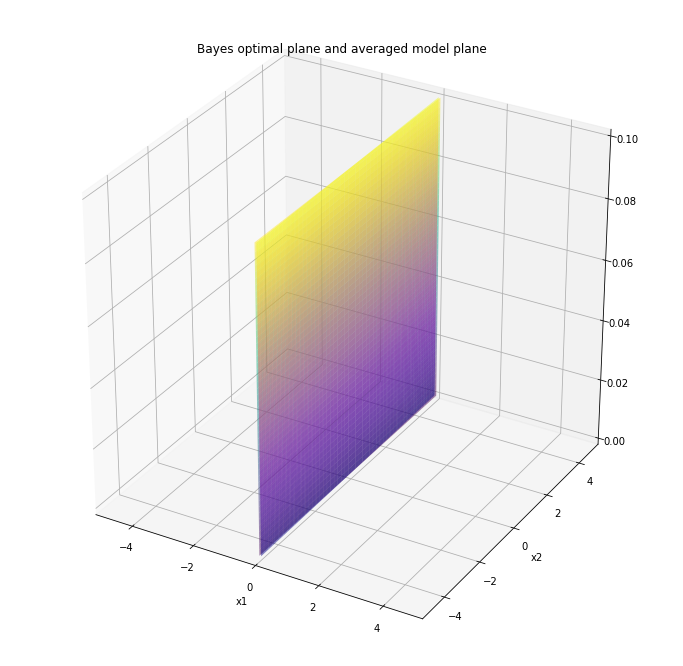

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import sqrtm
import scipy as sp
d = 2
X,X2 = [],[]
mu1 = np.array([-1,1])
sigma1 = np.array([[1,0],[0,2]])
mu2 = np.array([1,1])
sigma2 = np.array([[1,0],[0,2]])
x1,x2 = [],[]
A = sqrtm(sigma1)
A2 = sqrtm(sigma2) 
b = mu1
for i in range(5000):
  X.append(np.random.randn(d))
  X2.append(np.random.randn(d))
  X[i] = np.dot(A,X[i]) + mu1
  X2[i] = np.dot(A2,X2[i]) + mu2
  Z = X[i]
  x1.append(Z[0])
  x2.append(Z[1])

X = np.array(X)
X2 = np.array(X2)
X = np.concatenate((X,X2),axis = 0)
Y = np.array([1]*5000)
Y2 = np.array([-1]*5000)
Y = np.concatenate((Y,Y2),axis = 0).reshape(10000,1)
lambd = 0.1
# Y = np.reshape(10000,1)

on = np.ones(len(X))
d = X.shape[1]
B = 0
n = X.shape[0]
# X = np.insert(X,2,on,axis=1)


bb = 0
b = 0
eta = 0.1
t = 1
WW = []
BB = []
s = np.array([[0],[0]])
# print(np.shape(w))
while t <= 100:
  
  w = np.random.rand(2,1)


  converge = 0
  while converge != d:
      w_old = w

      O = 1/(1+np.exp(-Y * (B + np.dot(X,w))))
    
      GG = (X*((O-1)*Y))
      GG_1 = np.sum(GG,axis=0).reshape(2,1)/n
      w = w - eta * GG_1

      #Gradient for b train
      m1 = 1/(1+np.exp(-Y * (B + np.dot(X,w))))

      B = B - eta * (m1-1) * Y/n
      b = np.mean(B)
      # cost_func = 1/n * np.sum(np.log(1+np.exp(np.multiply(-Y,B+np.dot(w.T,X.T))))) + lambd* np.sum(pow(w,2))

      
      converge = 0
      for i in range(len(w)):
        if np.absolute(w_old[i] - w[i]) <= 0.0001:
          converge = converge + 1
     
  WW.append(w)
  s = s+w


  bb = bb + b
  t=t+1


WER = s/100
print("The Weight vector(Emrical Risk Minimization classifier) learnt is:")
print(WER)
b = b/100
print("The offset learnt(b) is:")
print(b)


y_hat = np.dot(X,WER) + b

y = np.linspace(-5,5,100)
z = np.linspace(0,0.1,100)
y,z = np.meshgrid(y,z)
x = y*0
x1 = WER[1,0]*y/WER[0,0]
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis',linewidth=0,alpha=0.5)
ax.plot_surface(x1, y, z,cmap='plasma',linewidth=0,alpha=0.5)

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Bayes optimal plane and averaged model plane")



(-5.0, 5.0)

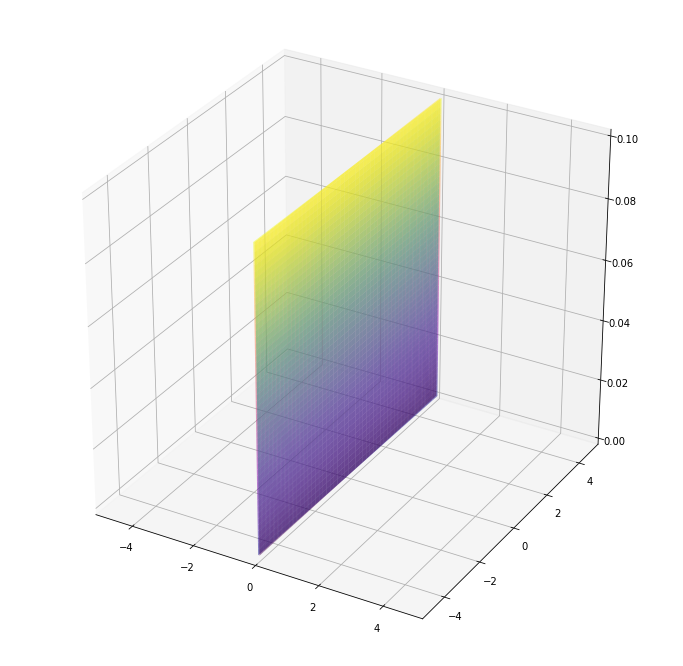

In [8]:
# y_hat = np.dot(X,WER) + b

# y = np.linspace(-5,5,100)
# z = np.linspace(0,0.1,100)
# y,z = np.meshgrid(y,z)
# x = y*0
# x1 = WER[1,0]*y/WER[0,0]
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis',linewidth=0,alpha=0.5)
ax.plot_surface(x1, y, z,cmap='plasma',linewidth=0,alpha=0.5)

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)